In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Loading and Visualizing Data
### Download, Load, Visualize, Normalisation

In [2]:
X = pd.read_csv('./Datasets/Linear_X_Train.csv')
Y = pd.read_csv('./Datasets/Linear_Y_Train.csv')

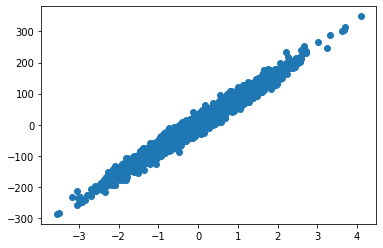

In [3]:
# Visualize
plt.scatter(X,Y)
plt.show()

In [4]:
X.shape,Y.shape

((3750, 1), (3750, 1))

In [5]:
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [6]:
# Convert X and Y to numpy
X = X.values
Y = Y.values

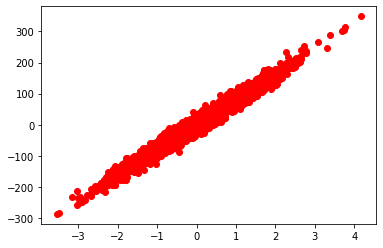

In [9]:
# Normalization
u = X.mean()
std = X.std()
X = (X-u)/std
plt.scatter(X,Y,color='red')
plt.show()

## Implementing Gradient Descent

In [17]:
def hypothesis(x,theta):
    y_ = theta[0]+theta[1]*x
    return y_

def gradient(X,Y,theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        y = Y[i]
        grad[0] += (y_-y)
        grad[1] += (y_-y)*X[i]
    return grad/m

def error(X,Y,theta):
    m = X.shape[0]
    total_err = 0.0
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        total_err += (Y[i]-y_)**2
    return total_err/m

def gradientDescent(X,Y,lr=0.1,max_steps = 100):
    theta = np.zeros((2,))
    error_list = []
    for i in range(max_steps):
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)
        error_list.append(e)
        theta[0] = theta[0]-lr*grad[0]
        theta[1] = theta[1]-lr*grad[1]
    return theta,error_list

In [18]:
theta,err_list = gradientDescent(X,Y)

In [19]:
theta

array([ 0.6838508 , 79.90361453])

In [20]:
err_list

[array([6576.35005246]),
 array([5363.12510257]),
 array([4380.41289317]),
 array([3584.41600355]),
 array([2939.65852295]),
 array([2417.40496367]),
 array([1994.37958066]),
 array([1651.72902041]),
 array([1374.18206661]),
 array([1149.36903404]),
 array([967.27047765]),
 array([819.77064698]),
 array([700.29578413]),
 array([603.52114523]),
 array([525.13368772]),
 array([461.63984713]),
 array([410.20983626]),
 array([368.55152745]),
 array([334.80829731]),
 array([307.47628091]),
 array([285.33734761]),
 array([267.40481165]),
 array([252.87945752]),
 array([241.11392067]),
 array([231.58383582]),
 array([223.8644671]),
 array([217.61177843]),
 array([212.54710061]),
 array([208.44471157]),
 array([205.12177646]),
 array([202.43019901]),
 array([200.25002128]),
 array([198.48407732]),
 array([197.05366271]),
 array([195.89502687]),
 array([194.95653185]),
 array([194.19635088]),
 array([193.58060429]),
 array([193.08184956]),
 array([192.67785822]),
 array([192.35062524]),
 array(

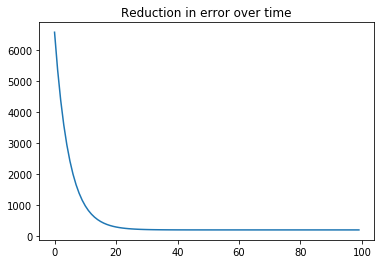

In [21]:
plt.plot(err_list)
plt.title("Reduction in error over time")
plt.show()

## Predictions and Best Line

In [22]:
y_ = hypothesis(X,theta)
print(y_)

[[-19.5733619 ]
 [-43.69571729]
 [ 86.4848761 ]
 ...
 [-20.85044708]
 [138.70197319]
 [-35.87897262]]


No handles with labels found to put in legend.


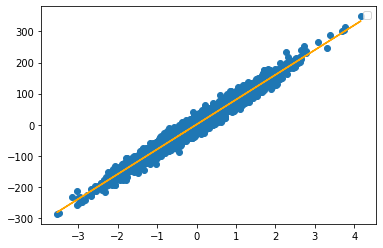

In [25]:
#Training + Predictions
plt.scatter(X,Y)
plt.plot(X,y_,color='orange')
plt.legend()
plt.show()


# Making Predictions using test data

In [26]:
X_test = pd.read_csv('./Datasets/Linear_X_Test.csv')
Y_test = hypothesis(X_test,theta)

In [30]:
Y_test.shape

(1250, 1)

In [31]:
df = pd.DataFrame(data=Y_test,columns=["y"])

In [32]:
df.to_csv('y_pred.csv',index=False)
